In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv(r"C:\Users\Amey\PycharmProjects\weather forecasting\wdata\Temperature_And_Precipitation_Cities_IN\Delhi_NCR_1990_2022_Safdarjung.csv")

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,9.4,6.0,15.1,0.0
1,02-01-1990,9.3,5.2,14.2,0.0
2,03-01-1990,9.0,6.5,13.6,0.0
3,04-01-1990,10.7,6.0,17.5,0.0
4,05-01-1990,12.6,7.3,20.8,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

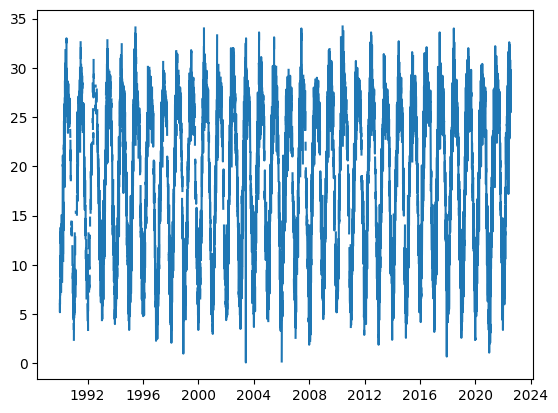

In [8]:
plt.plot(df['time'],df['tmin'])

In [9]:
data=df[['time','tmin']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_26704\1344980971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,6.0
1,1990-01-02,5.2
2,1990-01-03,6.5
3,1990-01-04,6.0
4,1990-01-05,7.3


In [10]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [11]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.56% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (162) is too small than the required number                     for the learning rate finder (250). The results might not be optimal.


Finding best initial lr:   0%|          | 0/250 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,25.988281,31.887068,0.417854,0.0,0
1,23.342224,28.837894,0.354393,0.0,1
2,20.777929,25.809217,0.294943,0.0,2
3,18.313299,22.880453,0.239725,0.0,3
4,15.953070,19.993299,0.189275,0.0,4
...,...,...,...,...,...
995,1.733570,2.206464,0.002282,0.0,995
996,1.733945,2.210760,0.002284,0.0,996
997,1.733696,2.209804,0.002283,0.0,997
998,1.733752,2.209044,0.002283,0.0,998


In [12]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.56% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 162it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,27.230299,19.199678,8.049448,-0.018825
1,2022-07-27,None,27.297689,19.199717,8.018954,0.079019
2,2022-07-28,None,27.223515,19.199755,7.988731,0.035028
3,2022-07-29,None,27.185274,19.199795,7.958830,0.026648
4,2022-07-30,None,27.054726,19.199835,7.929407,-0.074515


In [13]:
plot1=model.plot(forecast)

In [14]:
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '5392e40b-229c-40cd-a939-064dce47112e',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([27.230299 , 27.29769  , 27.223515 , ...,  7.126864 ,  7.101053 ,
                           7.1168766], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              '

In [15]:
with open('delhi_min_model.pkl','wb') as f:
    pickle.dump(model,f)